Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

In [1]:
# Import required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Q1. Load the dataset 

In [2]:
df = pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.shape

(195, 24)

### Q2. Use the .describe() method on the dataset and state any insights you may come across.

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


### Q3. Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

In [5]:
df['status'].value_counts()

#  The dataset have more representation of Parkinson's disease

1    147
0     48
Name: status, dtype: int64

### Q4. Check for missing vaues and take necessary measures by dropping observation or imputing them.

In [6]:
df.isnull().sum().sum()
# There is no missing values in the dataset

0

### Q5. Plot the distribution of all the features. State any observations you can make based on the distribution plots.

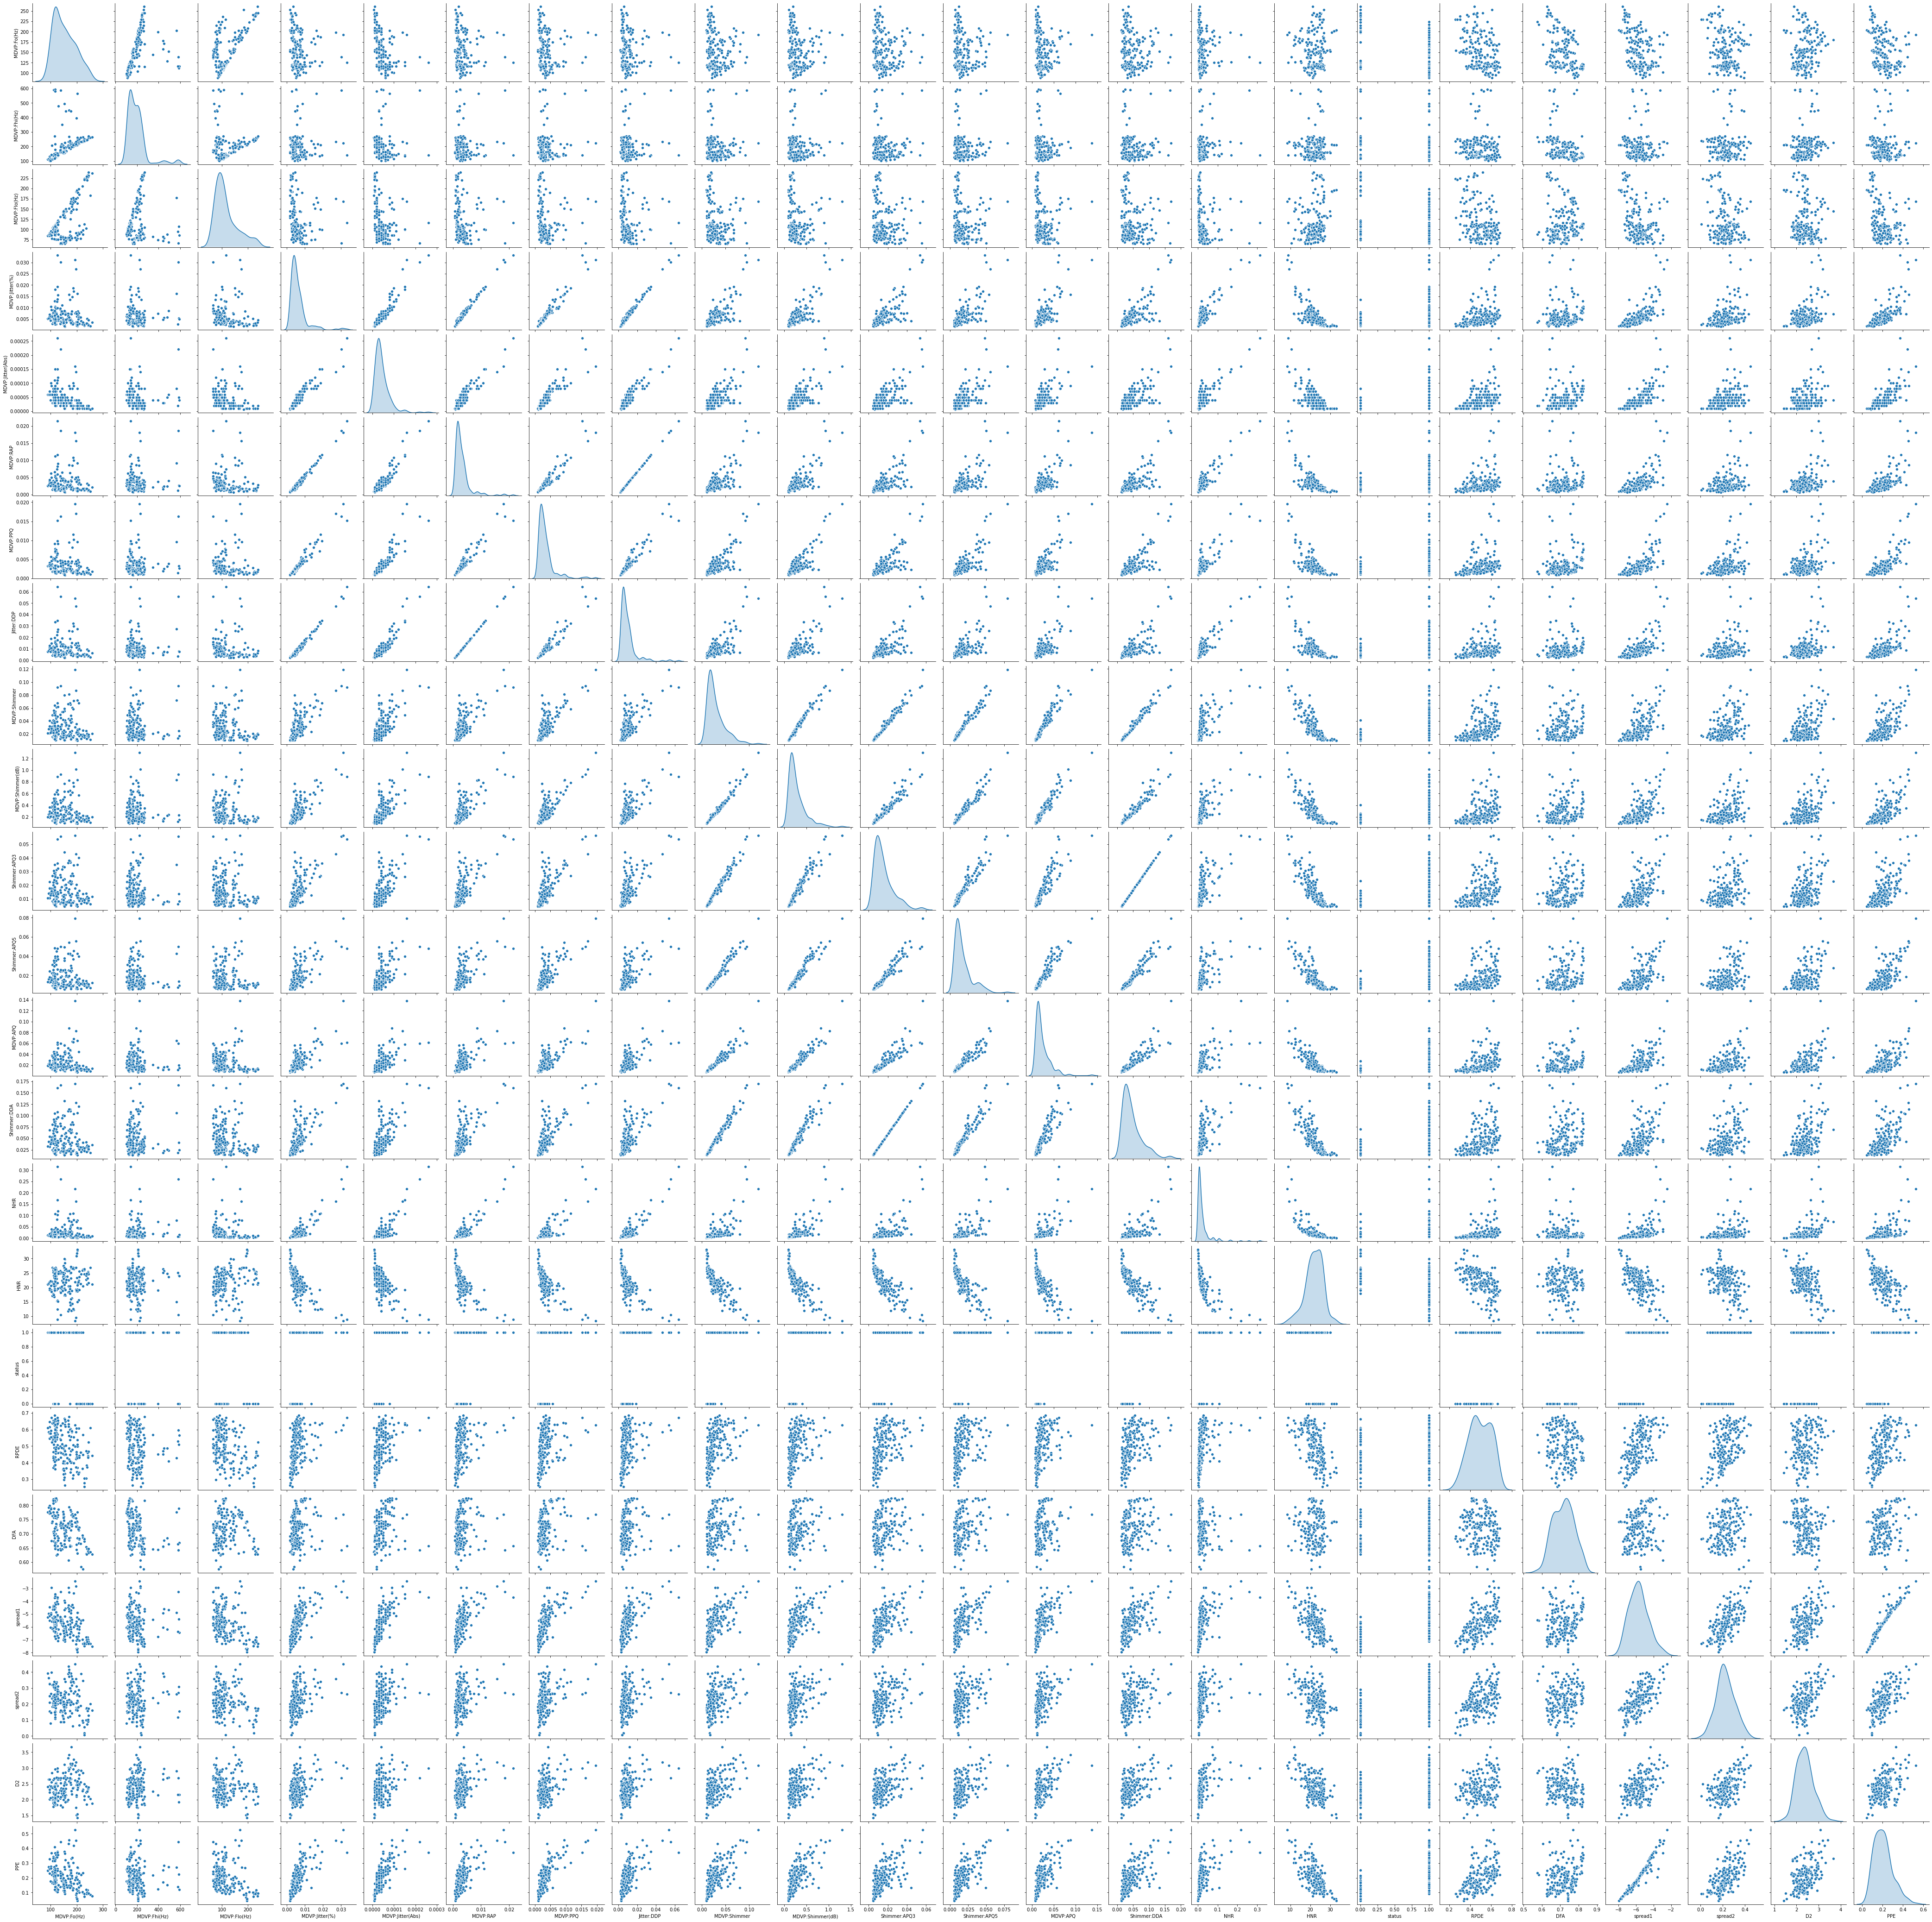

In [7]:
sns.pairplot(df, diag_kind='kde')
plt.show()

### Q6. Check for outliers in the data. Are there any variables with high amount of outliers.

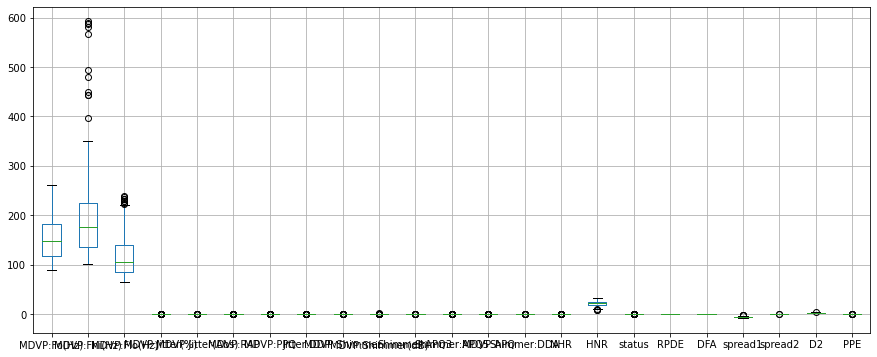

In [8]:
plt.figure(figsize=(15,6))
df.boxplot()
plt.show()

# 'MDVP:Fhi(Hz)' have more outliers and it is right skewed.

### Q7. Are there any strong correlations among the independent features?

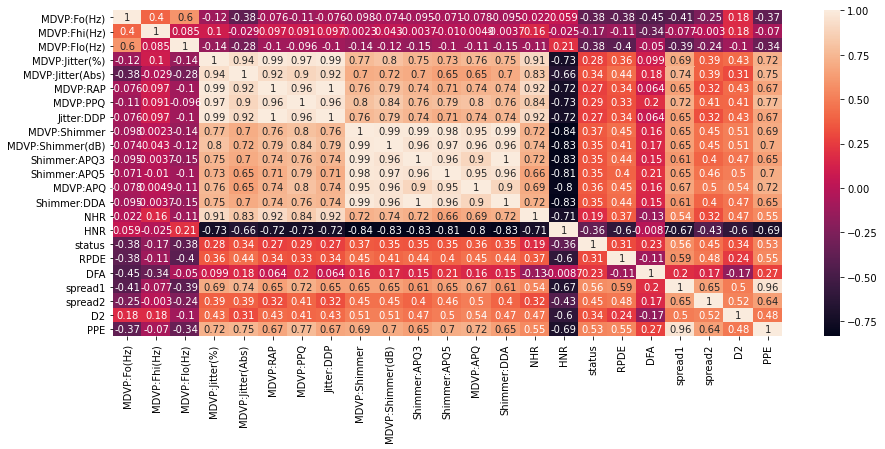

In [9]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [10]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

# Data preprocessing

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [12]:
df.drop('name', axis=1, inplace=True)

### Q8. Split dataset into training & test dataset  

In [13]:
from sklearn.model_selection import train_test_split

x = df.drop('status', axis=1)
y = df['status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### Q9. Create a default decision tree model using criterion = Entropy 

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')

dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [15]:
y_train_pred = dtc.predict(x_train)
y_test_pred = dtc.predict(x_test)

print('Accuracy score for train :', dtc.score(x_train, y_train))
print('Accuracy score for test :', dtc.score(x_test, y_test))

Accuracy score for train : 1.0
Accuracy score for test : 0.8983050847457628


### Q10.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dtc = DecisionTreeClassifier(criterion='entropy')
params = {'max_depth':sp_randint(2,10), 'min_samples_leaf':sp_randint(1,10)}
rsearch = RandomizedSearchCV(dtc, param_distributions=params, cv=3, n_iter=100, n_jobs=-1, scoring='roc_auc')
rsearch.fit(x,y)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(criterion='entropy'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FF4CC34520>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FF4CC34910>},
                   scoring='roc_auc')

In [17]:
rsearch.best_params_

{'max_depth': 3, 'min_samples_leaf': 2}

In [18]:
dtc = DecisionTreeClassifier(**rsearch.best_params_, criterion='entropy')
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2)

In [19]:
y_train_pred = dtc.predict(x_train)
y_test_pred = dtc.predict(x_test)

print('Accuracy score for train :', dtc.score(x_train, y_train))
print('Accuracy score for test :', dtc.score(x_test, y_test))

Accuracy score for train : 0.9705882352941176
Accuracy score for test : 0.8983050847457628


### Q11. Implement a Random Forest model. What is the optimal number of trees that gives the best result?

In [20]:
# Implemeting Random forest model and checking optimal number of trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy')
params = {'n_estimators':sp_randint(50,300)}

rsearch = RandomizedSearchCV(rf, param_distributions=params, cv=3, n_iter=100, n_jobs=-1, scoring='roc_auc')
rsearch.fit(x,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(criterion='entropy'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FF4CC878E0>},
                   scoring='roc_auc')

In [21]:
print('Optimal number of trees are :', rsearch.best_params_)

Optimal number of trees are : {'n_estimators': 183}


In [22]:
rfc = RandomForestClassifier(**rsearch.best_params_, criterion='entropy')
rfc.fit(x_train, y_train)

y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

print('Accuracy score for train :', rfc.score(x_train, y_train))
print('Accuracy score for test :', rfc.score(x_test, y_test))

Accuracy score for train : 1.0
Accuracy score for test : 0.847457627118644
